<a href="https://colab.research.google.com/github/HamedFarahani89/Statistical-methods-and-Quantitative-finance/blob/main/Kramers%E2%88%92Moyal_coefficients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ornstein−Uhlenbeck process

$$\mathrm{d}y(t) = -\theta y(t)\mathrm{d}t + \sigma \mathrm{d}W(t), $$

$\theta$ the drift, $\sigma$ diffusion and $\mathrm{d}W(t)$ the Brownian motion

In [2]:
# The drift and diffusion
theta = 0.3
sigma = 0.1

# The total integration time
t_start = 0
t_final = 500

# The desired timestep of integration
delta_t = 0.001

# time array of the process
time = np.linspace(0, t_final, t_final * int(1 / delta_t))

In [3]:
# Initialise the array y
y = np.zeros([time.size])

# Generate a Wiener process with a scale of np.sqrt(delta_t)
dW = np.random.normal(loc = 0, scale = np.sqrt(delta_t), size = [time.size,1])
# you can equivalently use np.sqrt(delta_t) * np.random.normal(loc=0, scale=1,size=[time.size,1])

# Give some small random initial conditions
y[0]=np.random.normal(size = 1) / 10

# Integrate the process
for i in range(1, time.size):
    y[i] = y[i-1] - theta * y[i-1] * delta_t + sigma * dW[i]

<ipython-input-3-cb8ca8e04067>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[0]=np.random.normal(size = 1) / 10
<ipython-input-3-cb8ca8e04067>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i] = y[i-1] - theta * y[i-1] * delta_t + sigma * dW[i]


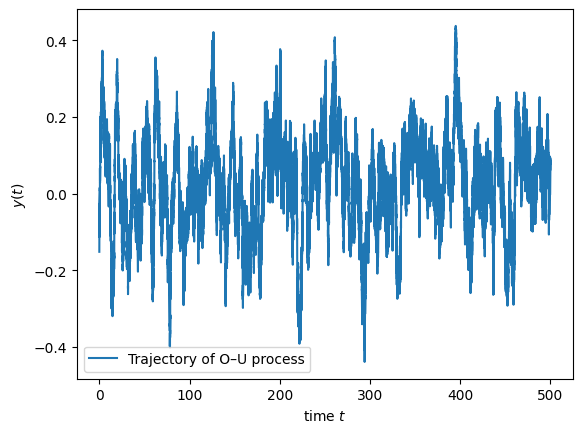

In [4]:
#This is the stochastic trajectory over time
plt.plot(time, y , label = r'Trajectory of O–U process')

plt.xlabel(r'time $t$')
plt.ylabel(r'$y(t)$')
plt.legend()

## Obtaining the Kramers−Moyal coefficients

We will now implement the KM package to calculate the Kramers−Moyal coefficients

In [7]:
pip install kramersmoyal


In [8]:
# Import your (favourite) package to calculate Kramers−Moyal coefficients
# You will need only km to perform the calculation
from kramersmoyal import km

In [9]:
# Choose the size of your target space
bins = np.array([5000])

# Introduce the desired orders to calculate
# Please keep the  [0]  term. It is the normalisation.
powers = np.array([[0], [1], [2], [3], [4], [5], [6], [7], [8]])

# Choose a desired bandwidth bw
# this is similar to the inverse of number of bins
bw = 0.1

# Calculate the Kramers−Moyal coefficients
kmc, edges = km(y, bw = bw, bins = bins, powers = powers)

# The K−M coefficients are stacked along the fisrt dim of the
# kmc array, so kmc[1,:] is the first K−M coefficient, kmc[2,:]
# is the second, etc. etc.

## Visualising the Kramers−Moyal coefficients

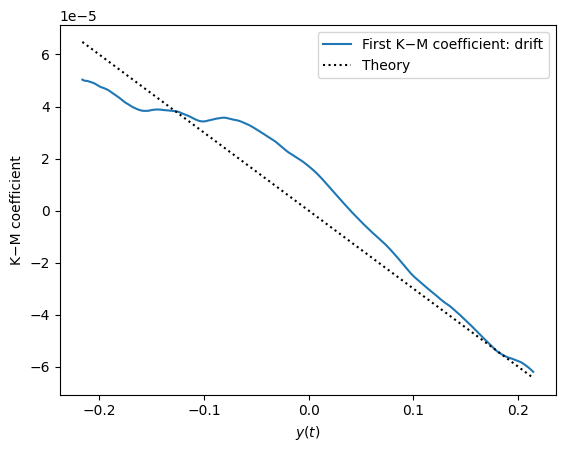

In [10]:
# Lets restrict the plot to where we have good statistics
# but include the timestep normalisation 1 / delta_t
plt.plot(edges[0][1500:-1500], kmc[1,1500:-1500], label = r'First K−M coefficient: drift')

# And to guide the eye, here is the actual theoretical value,
plt.plot(edges[0][1500:-1500], -edges[0][1500:-1500] * theta * delta_t, ':', label = r'Theory', color=r'black')

# For a physics understanding of the process, recall to always divide
# the Kramers−Moyal coefficients by / delta_t

plt.xlabel(r'$y(t)$')
plt.ylabel(r'K−M coefficient')
plt.legend()

And now the second Kramers−Moyal coefficients, i.e., the diffusion coefficient

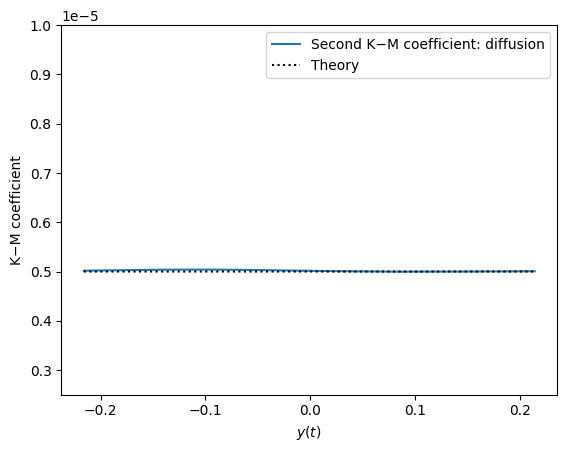

In [11]:
# Lets restrict the plot to where we have good statistics
plt.plot(edges[0][1500:-1500], kmc[2,1500:-1500], label = r'Second K−M coefficient: diffusion')

# And to guide the eye, here is the actual theoretical value,
# which is a constant of value sigma**2 * delta_t /2
plt.plot(edges[0][1500:-1500], np.ones(edges[0][1500:-1500].size) * sigma**2 * delta_t / 2, ':', label = r'Theory', color=r'black')

plt.xlabel(r'$y(t)$')
plt.ylabel(r'K−M coefficient')
plt.ylim([sigma**2 * delta_t / 4, sigma**2 * delta_t])
plt.legend()